# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

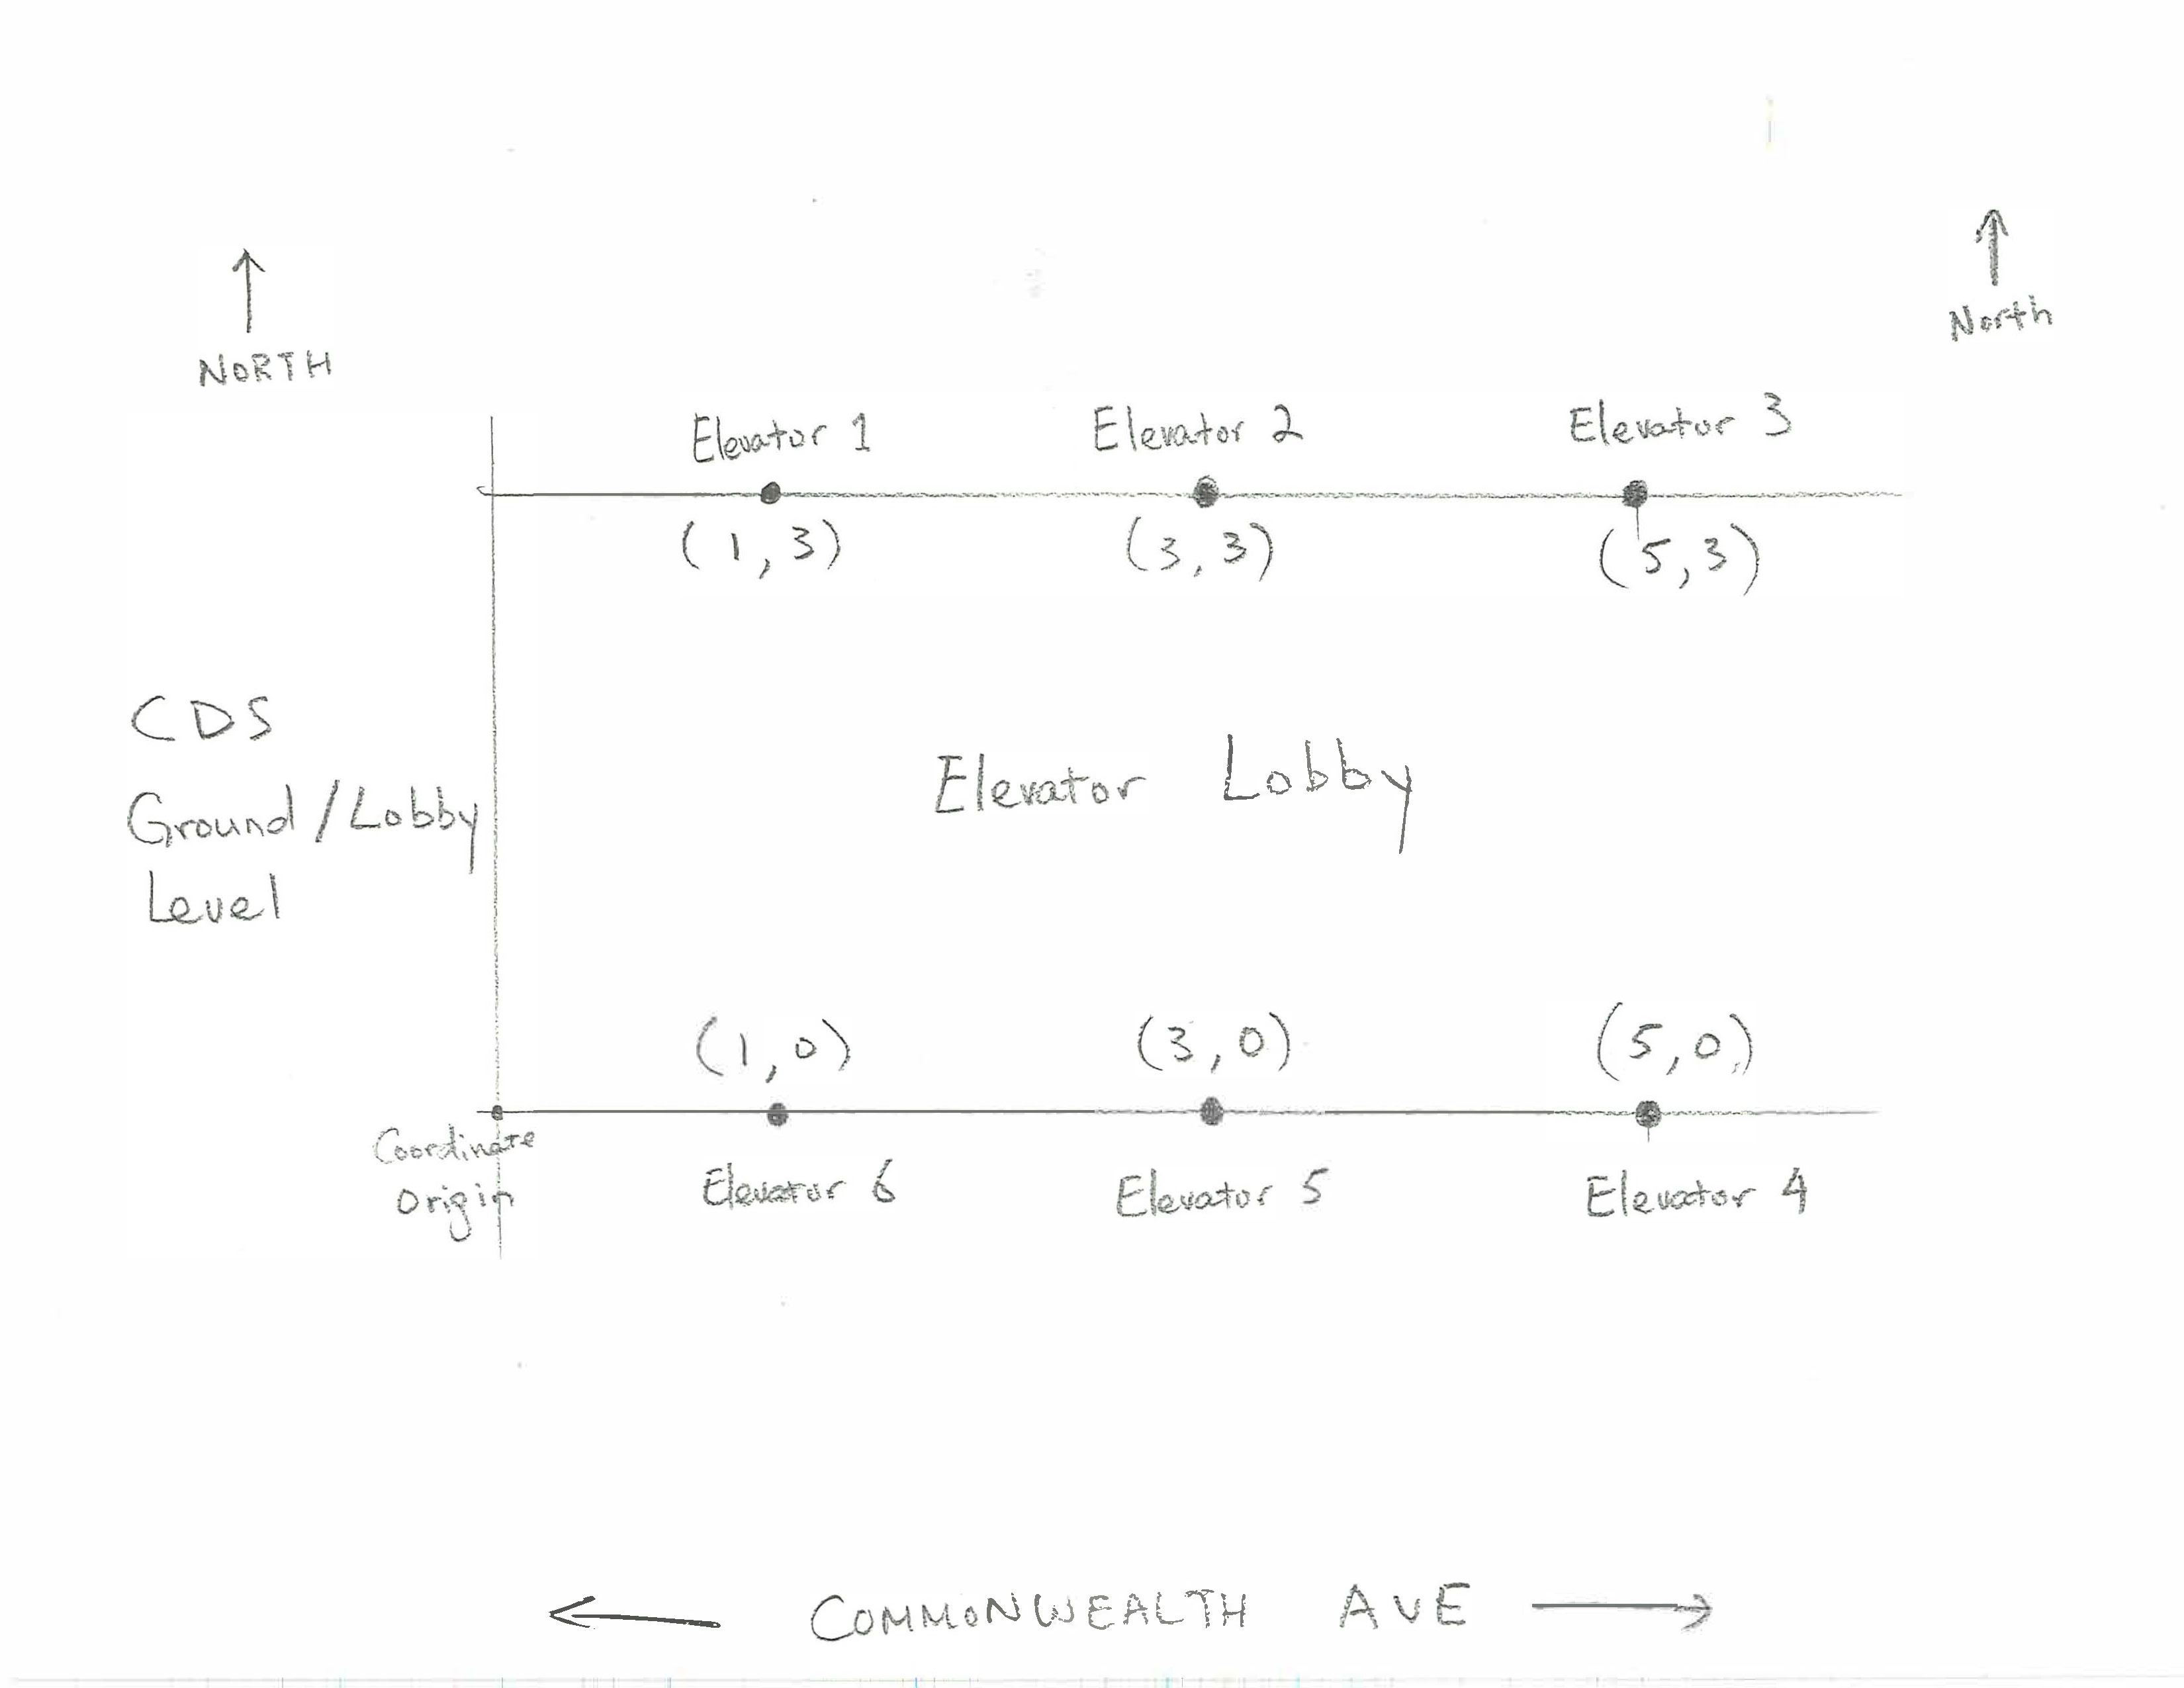

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.



**Answer:** To minimize the expected walking distance to the next arriving elevator, I should stand at the central point between all six elevators. Given their coordinates:

Average x-coordinate: (1 + 3 + 5 + 5 + 3 + 1) ÷ 6 = 3
Average y-coordinate: (3 + 3 + 3 + 0 + 0 + 0) ÷ 6 = 1.5
By standing at (3, 1.5), I am equally close to all elevators, minimizing the expected walking distance regardless of which one arrives next. This approach utilizes the symmetry of the elevator layout and the equal probability of each elevator's arrival.








**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

Saving CDS Elevator Arrivals (Responses) - Form Responses 1 (1) - CDS Elevator Arrivals (Responses) - Form Responses 1 (1).csv to CDS Elevator Arrivals (Responses) - Form Responses 1 (1) - CDS Elevator Arrivals (Responses) - Form Responses 1 (1) (1).csv


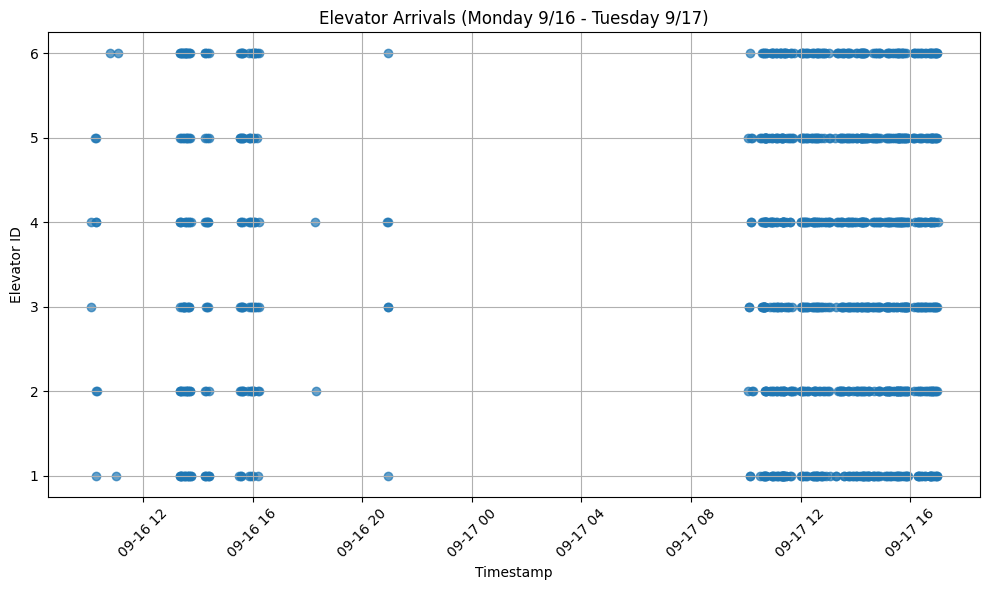

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Assuming the file is uploaded, get the filename from the uploaded dictionary
file_name = next(iter(uploaded))

# Load the CSV data into a DataFrame
data = pd.read_csv(file_name)

# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Function to plot the elevator arrivals (Question 2)
def make_plot():
    '''
    Function to plot elevator arrivals as a scatter plot.
    X-axis: Timestamp of arrival
    Y-axis: Elevator ID
    '''
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Timestamp'], data['Elevator ID'], alpha=0.7)
    plt.title('Elevator Arrivals (Monday 9/16 - Tuesday 9/17)')
    plt.xlabel('Timestamp')
    plt.ylabel('Elevator ID')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to generate the plot
make_plot()


State observations here (briefly).




For most of the day, the elevator arrivals appear consistent across all elevators, indicating that no single elevator was significantly more or less utilized than the others during peak hours.



There are clusters of elevator activity, particularly between 12pm and 4pm on both days.The hours with the highest number of elevator arrivals can indicate peak traffic times in the building, it indicates that this is when most people arrive at the building for class or office hour.



This is the picture of my plot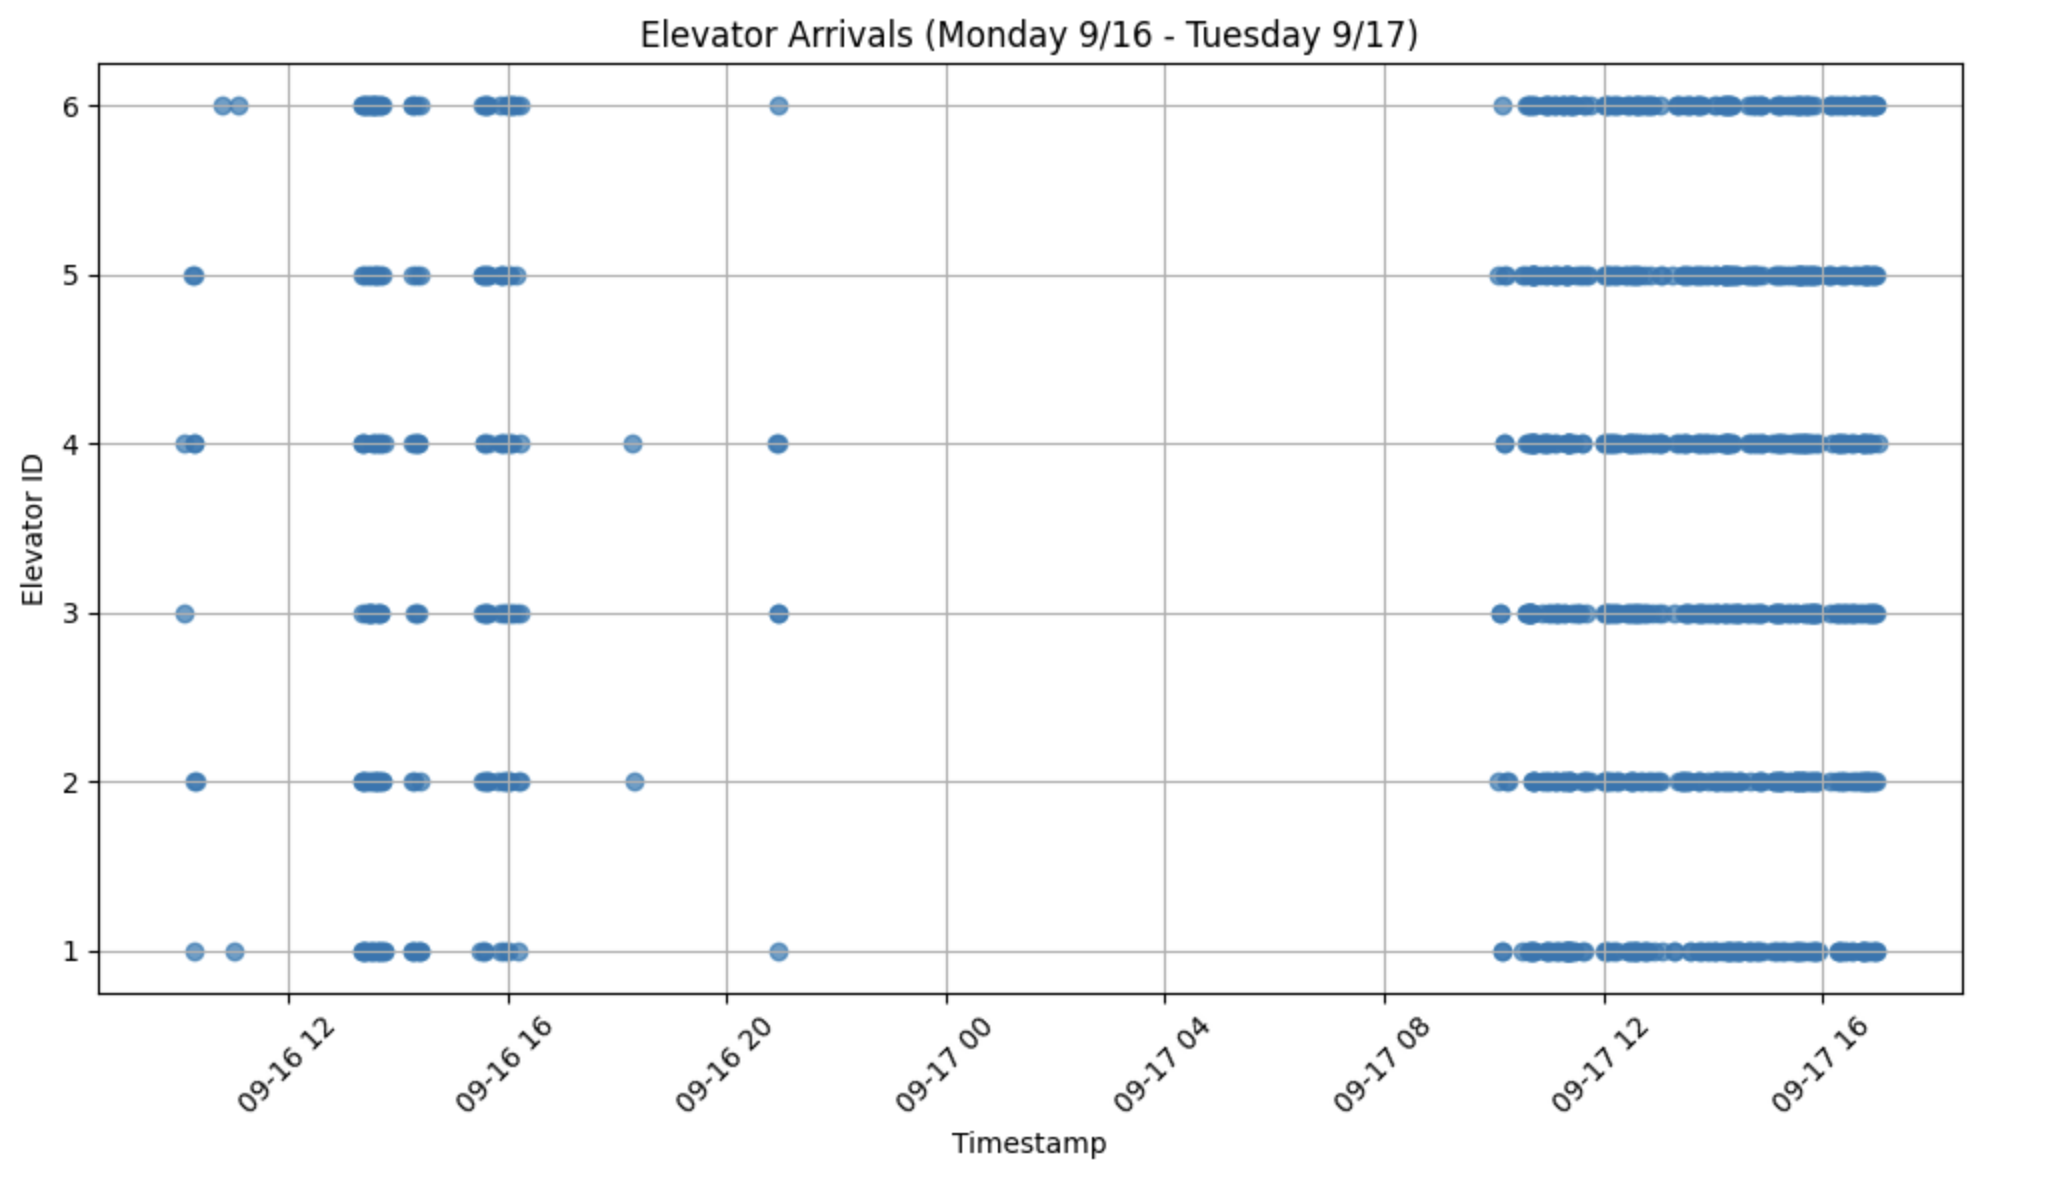

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [17]:

# Calculate the total time period for data collection
start_time = data['Timestamp'].min()
end_time = data['Timestamp'].max()
total_seconds = (end_time - start_time).total_seconds()

# Calculate the frequency of arrivals for each elevator
elevator_frequencies = data.groupby('Elevator ID').size() / total_seconds
elevator_frequencies = elevator_frequencies.reset_index(name='Arrivals per second')

# Number of arrivals for each elevator
number_of_arrivals = data.groupby('Elevator ID').size()

# Create the Elevator Frequency Table DataFrame
elevator_frequencies_table = pd.DataFrame({
    'Elevator ID': number_of_arrivals.index,
    'Total data collection time (seconds)': total_seconds,
    'Number of arrivals': number_of_arrivals.values,
    'Average frequency (arrivals per second)': elevator_frequencies['Arrivals per second']
})

# Function to print total data collection time, number of arrivals, and average frequency
def print_elevator_data_no_chart(data, elevator_frequencies_table):
    # Print the total data collection time (it's the same for all elevators)
    print(f"Total Data Collection Time (seconds): {int(total_seconds)} seconds")

    # Print the number of arrivals for each elevator
    print("\nNumber of Arrivals for Each Elevator:")
    for elevator_id, arrivals in number_of_arrivals.items():
        print(f"Elevator {elevator_id}: {arrivals} arrivals")

    # Print the average frequency (arrivals per second) for each elevator
    print("\nAverage Frequency (arrivals per second) for Each Elevator:")
    for index, row in elevator_frequencies_table.iterrows():
        print(f"Elevator {int(row['Elevator ID'])}: {round(row['Average frequency (arrivals per second)'], 6)} arrivals/second")

# Call the function to print total data collection time, number of arrivals, and average frequency
print_elevator_data_no_chart(data, elevator_frequencies_table)


Total Data Collection Time (seconds): 111294 seconds

Number of Arrivals for Each Elevator:
Elevator 1: 155 arrivals
Elevator 2: 162 arrivals
Elevator 3: 170 arrivals
Elevator 4: 168 arrivals
Elevator 5: 167 arrivals
Elevator 6: 159 arrivals

Average Frequency (arrivals per second) for Each Elevator:
Elevator 1: 0.001393 arrivals/second
Elevator 2: 0.001456 arrivals/second
Elevator 3: 0.001527 arrivals/second
Elevator 4: 0.00151 arrivals/second
Elevator 5: 0.001501 arrivals/second
Elevator 6: 0.001429 arrivals/second


**Answer:**


The average frequency of elevator arrivals varies slightly between elevators. Elevator 3 has the highest average arrival frequency, followed closely by elevators 4, 5, and 2. Elevator 1 has the lowest average frequency.
Therefore, to minimize the expected waiting time for the next elevator, it would be optimal to wait near Elevator 3, since it arrives most frequently based on this data.
However, since the difference in frequency between the elevators is relatively small, waiting near the center of the elevator bank (closer to elevators 3, 4, and 5) might also be a reasonable strategy. This would minimize walking distance if another elevator arrives first while also positioning myself near the most frequent elevators.



| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 111294 | 111294 | 111294 | 111294 | 111294 | 111294 |
| Number of arrivals | 155 | 162 | 170 | 168 | 167 | 159 |
| Average frequency (arrivals per second) | 0.001393 | 0.001456 | 0.001527 | 0.00151 | 0.001501 | 0.001429 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

**Answer:**
0.158+0.1651+0.1733+0.1713+0.1702+0.1621=1.000

Elevators with higher arrival frequencies are more likely to be the next to arrive because they tend to make more trips over time. By normalizing the average frequencies, we account for these differences and obtain probabilities that reflect the relative likelihood of each elevator's arrival. Since we have no prior knowledge of the elevator locations or which was last to arrive, we use the frequency of past arrivals to estimate the probability of the next arrival. Elevators 3, 4, and 5 are slightly more likely to be the next to arrive based on their higher frequencies, but the differences between the probabilities are small.


| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.158 | 0.165 1| 0.1733 | 0.1713 | 0.1702 |0.1621 |

In [25]:
# Function to calculate and print the probabilities of each elevator being the next to arrive
def calculate_elevator_probabilities(elevator_frequencies_table):
    # Sum of all average frequencies
    total_frequency = elevator_frequencies_table['Average frequency (arrivals per second)'].sum()

    # Calculate and print probabilities for each elevator
    print("\nElevator ID | Probability of being the next elevator to arrive")
    print("-----------------------------------------------------------")
    for index, row in elevator_frequencies_table.iterrows():
        elevator_id = int(row['Elevator ID'])
        avg_frequency = row['Average frequency (arrivals per second)']
        probability = avg_frequency / total_frequency
        print(f"Elevator {elevator_id}: {round(probability, 4)}")

# Call the function to calculate and print probabilities
calculate_elevator_probabilities(elevator_frequencies_table)



Elevator ID | Probability of being the next elevator to arrive
-----------------------------------------------------------
Elevator 1: 0.158
Elevator 2: 0.1651
Elevator 3: 0.1733
Elevator 4: 0.1713
Elevator 5: 0.1702
Elevator 6: 0.1621


**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


**Answer:**


 By standing at the point (3.045, 1.488), we can minimize the expected walking distance to the next arriving elevator, taking into account both their locations and the probabilities of their arrivals.

1. **Weighted Average \( x \)-coordinate:**


   \
   \begin{align*}
   x_{\text{avg}} &= (1 \times 0.158) + (3 \times 0.165) + (5 \times 0.173) + (5 \times 0.171) + (3 \times 0.170) + (1 \times 0.162) \\
   &= 0.158 + 0.495 + 0.865 + 0.855 + 0.510 + 0.162 \\
   &= 3.045
   \end{align*}
   \

2. **Weighted Average \( y \)-coordinate:**


   \
   \begin{align*}
   y_{\text{avg}} &= (3 \times 0.158) + (3 \times 0.165) + (3 \times 0.173) + (0 \times 0.171) + (0 \times 0.170) + (0 \times 0.162) \\
   &= 0.474 + 0.495 + 0.519 + 0 + 0 + 0 \\
   &= 1.488
   \end{align*}
   \

  Intiitively, given that elevators 3, 4, and 5 are located in the middle of the bank of six elevators, the optimal waiting position is close to the center of these elevators.


**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [27]:
import numpy as np

# Coordinates of the elevators as provided
elevator_coordinates = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}

# Function to calculate the distance between two points (Euclidean distance)
def calculate_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

# Function to calculate the average walking distance from a given waiting location
def get_average_walk_distance(data, coordinate):
    '''
    data: CSV data containing elevator information.
    coordinate: the coordinate where the person is waiting.
    '''
    total_distance = 0
    num_samples = 0

    # Loop through the data and calculate the distance to the next elevator arrival
    for index, row in data.iterrows():
        elevator_id = int(row['Elevator ID'])
        elevator_coord = elevator_coordinates[elevator_id]

        # Calculate the distance from the waiting location to the elevator
        distance = calculate_distance(coordinate, elevator_coord)
        total_distance += distance
        num_samples += 1

    # Calculate the average walking distance
    average_walk_distance = total_distance / num_samples if num_samples > 0 else 0
    return average_walk_distance

# Example usage
# Calculate the average distance for waiting at the location from question 1, e.g., (2, 1.5)
question_1_location = (3, 1.5)

# Calculate the average distance for waiting at the location from question 5, which was (4, 1.5)
question_5_location = (3.045, 1.488)

# Get the average walking distances for both locations
average_distance_q1 = get_average_walk_distance(data, question_1_location)
average_distance_q5 = get_average_walk_distance(data, question_5_location)

# Print the results
average_distance_q1, average_distance_q5


(2.1646279306829768, 2.1640075715697074)

**Answer:**

Waiting at the location specified in Question 1 (3, 1.5): The average walking distance is approximately 2.146 units.
Waiting at the location specified in Question 5 (3.045, 1.488): The average walking distance is approximately 2.1640 units.
As expected, the location calculated in Question 5 results in a slightly shorter average walking distance compared to the location in Question 1.

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.1646 (copy from Question 6) |   2.1632 |
|Smart position (Question 5) | 2.1640 (copy from Question 6) |   2.1629 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:**


Yes, the smart position from Question 5 is a slightly better location to wait for the next elevator, as it results in a marginally shorter average walking distance compared to the naive position. Although the difference is small, it shows that the smart position minimizes walking distance more effectively.

The results indicate that the smart position is a good choice and that the method used to determine the optimal location (based on elevator arrival probabilities) was successful.

In [28]:
# Your code to import the necessary libraries and load the dataset

# Import necessary libraries
import pandas as pd
import numpy as np
from google.colab import files

# Upload the dataset (you will upload both training and test data files one after the other)
uploaded = files.upload()

# Assuming the file is uploaded, get the filename from the uploaded dictionary
file_name = next(iter(uploaded))

# Load the CSV data into a DataFrame
test_data = pd.read_csv(file_name)

# Coordinates of the elevators as provided
elevator_coordinates = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}

# Function to calculate the distance between two points (Euclidean distance)
def calculate_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

# Function to calculate the average walking distance from a given waiting location
def get_average_walk_distance(data, coordinate):
    '''
    data: CSV data containing elevator information.
    coordinate: the coordinate where the person is waiting.
    '''
    total_distance = 0
    num_samples = 0

    # Loop through the data and calculate the distance to the next elevator arrival
    for index, row in data.iterrows():
        elevator_id = int(row['Elevator ID'])
        elevator_coord = elevator_coordinates[elevator_id]

        # Calculate the distance from the waiting location to the elevator
        distance = calculate_distance(coordinate, elevator_coord)
        total_distance += distance
        num_samples += 1

    # Calculate the average walking distance
    average_walk_distance = total_distance / num_samples if num_samples > 0 else 0
    return average_walk_distance

# Coordinates for Question 1 and Question 5
question_1_location = (3, 1.5)  # Naive position from Question 1
question_5_location = (3.045, 1.488)  # Smart position from Question 5

# Assuming the data provided earlier (for training) is already available
# Calculate average walking distance for training data
average_distance_training_q1 = get_average_walk_distance(data, question_1_location)
average_distance_training_q5 = get_average_walk_distance(data, question_5_location)

# Calculate the average distance for Question 1 (naive position) on test data
average_distance_test_q1 = get_average_walk_distance(test_data, question_1_location)

# Calculate the average distance for Question 5 (smart position) on test data
average_distance_test_q5 = get_average_walk_distance(test_data, question_5_location)

# Print the average distances for both training and test data
print("Average Distance Walked (m)")
print(f"Naive position (Question 1): Training Data: {average_distance_training_q1}, Test Data: {average_distance_test_q1}")
print(f"Smart position (Question 5): Training Data: {average_distance_training_q5}, Test Data: {average_distance_test_q5}")


Saving training_data2.csv to training_data2.csv
Average Distance Walked (m)
Naive position (Question 1): Training Data: 2.1646279306829768, Test Data: 2.163157894736842
Smart position (Question 5): Training Data: 2.1640075715697074, Test Data: 2.1629033212143494
